In [3]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import date
import datetime
from pathlib import Path
import seaborn as sns

In [4]:
caminho = r'Z:\Banco SIVEP Exportação'
lista_arquivos = os.listdir(caminho)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{caminho}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultimo_arquivo = lista_datas[0][1] #Pega o ultimo arquivo
ultimo_arquivo

'Banco SIVEP 13_12_2022 07_32_57.xlsx'

In [5]:
'''if not os.path.exists(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}'):
    os.makedirs(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}')'''

"if not os.path.exists(f'Z:\\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}'):\n    os.makedirs(f'Z:\\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}')"

In [6]:
dados = pd.read_excel(f'{caminho}/{ultimo_arquivo}')
#dados = pd.read_excel('Z:/Banco SIVEP Exportação/Banco SIVEP 30_05_2022 09_48_25.xlsx')

KeyboardInterrupt: 

In [ ]:
dados['pos_pcrflu'] = dados['pos_pcrflu'].map({1:'Sim',2:'Nao',9:'Ignorado'})

In [ ]:
dados['tp_flu_pcr'] = dados['tp_flu_pcr'].map({1:'Influenza A',2:'Influenza B'})

In [ ]:
dados['pcr_fluasu'] = dados['pcr_fluasu'].map({1:'Influenza A(H1N1)pdm09',2:'Influenza A(H3N2)',3:'Influenza A nao subtipado',
4:'Influenza A nao subtipavel',5:'Inconclusivo',6:'Outro'})

In [ ]:
filtro = dados[['Sem Epi Internacao','Classificacao final','pos_pcrflu','tp_flu_pcr','pcr_fluasu',"pcr_vsr"]]
filtro

,Sem Epi Internacao,Classificacao final,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
0,2021_51,Não Informado,NaN,NaN,NaN,NaN
1,2021_27,Não Informado,NaN,NaN,NaN,NaN
2,NaN,Não Informado,NaN,NaN,NaN,NaN
3,2021_05,COVID-19,NaN,NaN,NaN,NaN
4,NaN,COVID-19,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
184431,2021_07,COVID-19,Nao,NaN,NaN,NaN
184432,2021_36,COVID-19,NaN,NaN,NaN,NaN
184433,2021_11,COVID-19,NaN,NaN,NaN,NaN
184434,2020_29,SRAG não especificado,NaN,NaN,NaN,NaN


In [ ]:
base = filtro.groupby('Sem Epi Internacao').count()
base

,Classificacao final,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
Sem Epi Internacao,,,,,
2020_01,11,1,1,0,0
2020_02,24,0,0,0,0
2020_03,16,1,1,0,0
2020_04,22,1,1,0,0
2020_05,19,2,2,2,0
...,...,...,...,...,...
2022_42,200,24,4,4,6
2022_43,170,23,0,0,7
2022_44,135,14,2,2,7


In [ ]:
influenza = filtro.loc[filtro['Classificacao final']=='SRAG por influenza']
influenza

,Sem Epi Internacao,Classificacao final,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
493,2022_02,SRAG por influenza,Sim,Influenza,Influenza A(H3N2),NaN
1065,2022_02,SRAG por influenza,NaN,NaN,NaN,NaN
1332,2022_20,SRAG por influenza,Sim,Influenza,Influenza A(H3N2),NaN
1368,2022_01,SRAG por influenza,Sim,Influenza,Influenza A nao subtipado,NaN
2147,2022_01,SRAG por influenza,Sim,Influenza,Influenza A(H3N2),NaN
...,...,...,...,...,...,...
179777,2022_27,SRAG por influenza,NaN,NaN,NaN,NaN
180146,2022_20,SRAG por influenza,NaN,NaN,NaN,NaN
180392,2022_19,SRAG por influenza,Sim,Influenza,Influenza A(H3N2),NaN
181285,2022_19,SRAG por influenza,Sim,Influenza,Influenza A(H3N2),NaN


In [ ]:
contaCasos = influenza.groupby('Sem Epi Internacao').count()
contaCasos

,Classificacao final,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
Sem Epi Internacao,,,,,
2020_01,1,1,1,0,0
2020_03,1,1,1,0,0
2020_04,1,1,1,0,0
2020_05,2,2,2,2,0
2020_06,1,1,1,1,0
...,...,...,...,...,...
2022_41,5,2,2,2,0
2022_42,8,4,4,4,0
2022_43,6,0,0,0,0


In [ ]:
confirmadoInfluenza = contaCasos
confirmadoInfluenza = confirmadoInfluenza.reset_index()
confirmadoInfluenza = confirmadoInfluenza.merge(base, how='right', on='Sem Epi Internacao')
confirmadoInfluenza

,Sem Epi Internacao,Classificacao final_x,pos_pcrflu_x,tp_flu_pcr_x,pcr_fluasu_x,pcr_vsr_x,Classificacao final_y,pos_pcrflu_y,tp_flu_pcr_y,pcr_fluasu_y,pcr_vsr_y
0,2020_01,1.0,1.0,1.0,0.0,0.0,11,1,1,0,0
1,2020_02,NaN,NaN,NaN,NaN,NaN,24,0,0,0,0
2,2020_03,1.0,1.0,1.0,0.0,0.0,16,1,1,0,0
3,2020_04,1.0,1.0,1.0,0.0,0.0,22,1,1,0,0
4,2020_05,2.0,2.0,2.0,2.0,0.0,19,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...
146,2022_42,8.0,4.0,4.0,4.0,0.0,200,24,4,4,6
147,2022_43,6.0,0.0,0.0,0.0,0.0,170,23,0,0,7
148,2022_44,4.0,3.0,2.0,2.0,1.0,135,14,2,2,7
149,2022_45,2.0,2.0,2.0,2.0,0.0,125,16,2,2,7


In [ ]:
confirmadoInfluenza = confirmadoInfluenza['Classificacao final_x']

In [ ]:
vsr = filtro.loc[filtro['pcr_vsr']==1]
vsr = vsr.groupby('Sem Epi Internacao').count()
vsr = vsr.reset_index()
vsr = vsr.merge(base, how='right', on='Sem Epi Internacao')
vsr

,Sem Epi Internacao,Classificacao final_x,pos_pcrflu_x,tp_flu_pcr_x,pcr_fluasu_x,pcr_vsr_x,Classificacao final_y,pos_pcrflu_y,tp_flu_pcr_y,pcr_fluasu_y,pcr_vsr_y
0,2020_01,NaN,NaN,NaN,NaN,NaN,11,1,1,0,0
1,2020_02,NaN,NaN,NaN,NaN,NaN,24,0,0,0,0
2,2020_03,NaN,NaN,NaN,NaN,NaN,16,1,1,0,0
3,2020_04,NaN,NaN,NaN,NaN,NaN,22,1,1,0,0
4,2020_05,NaN,NaN,NaN,NaN,NaN,19,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...
146,2022_42,6.0,3.0,0.0,0.0,6.0,200,24,4,4,6
147,2022_43,7.0,6.0,0.0,0.0,7.0,170,23,0,0,7
148,2022_44,7.0,5.0,0.0,0.0,7.0,135,14,2,2,7
149,2022_45,7.0,7.0,0.0,0.0,7.0,125,16,2,2,7


In [ ]:
vsr = vsr.fillna(0)
vsr = vsr['pcr_vsr_x']
vsr

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
146    6.0
147    7.0
148    7.0
149    7.0
150    0.0
Name: pcr_vsr_x, Length: 151, dtype: float64

In [ ]:
semana = base.reset_index()
semana = semana['Sem Epi Internacao']
semana

0      2020_01
1      2020_02
2      2020_03
3      2020_04
4      2020_05
        ...   
146    2022_42
147    2022_43
148    2022_44
149    2022_45
150    2022_46
Name: Sem Epi Internacao, Length: 151, dtype: object

In [ ]:
#Pega o tamanho da variavel tamanho e faz com que o eixo x pule os valores de 2 em 2
tamanho_semana = np.size(semana)
eixo_x = np.arange(0,tamanho_semana,2)

In [ ]:
legenda_casosHospitalizados = pd.DataFrame(columns=['VSR','Influenza'])

In [ ]:
'''pasta = r'Z:\Graficos Boletim_Python'
lista_arquivos = os.listdir(pasta)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{pasta}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultima_pasta = lista_datas[0][1] #Pega o ultimo arquivo
ultima_pasta'''

'Gráficos 21_11_2022'

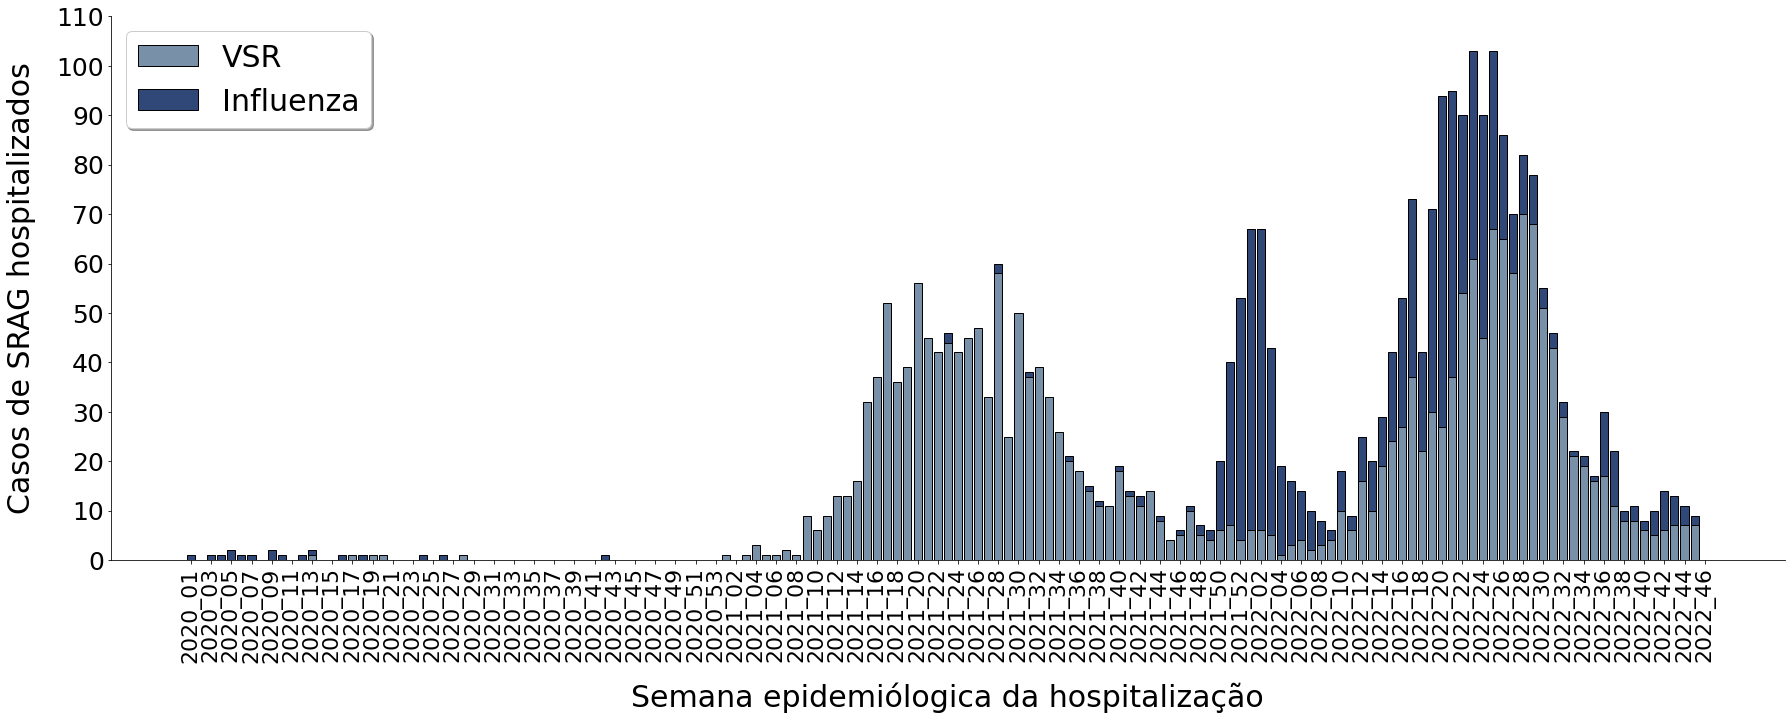

In [ ]:
#Plotagem do grafico
plt.figure(figsize=(30,10))
#plt.bar(semana,influenzaA, color='#8a3e4b',edgecolor='#000000')
plt.bar(semana,vsr, color = '#7890a8',edgecolor='#000000')
plt.bar(semana,confirmadoInfluenza, bottom = vsr,color='#304878',edgecolor='#000000')
sns.despine()
plt.legend(legenda_casosHospitalizados, fontsize=30,shadow=True,loc='upper left')
#plt.annotate('Primeiro caso\nhospitalizado por\nCOVID-19 no RS',xy=(3,620),xytext=(2,1500),arrowprops=dict(arrowstyle='->',connectionstyle='arc3'),fontsize=15,
#                bbox=dict(fc="white", ec="#000000", lw=1,pad=10))
plt.xticks(eixo_x,rotation=90,fontsize=22)
plt.yticks(np.arange(0,120,10),fontsize=25)
plt.xlabel('Semana epidemiólogica da hospitalização',labelpad=20,fontsize=30)
plt.ylabel('Casos de SRAG hospitalizados',labelpad=20,fontsize=30)
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/casosHosp_InfluVSR.png',dpi=720,bbox_inches='tight')